In [4]:
import pandas as pd
# products = pd.read_csv('./yf_amazon/products.csv')
products = pd.read_csv('./products_new.csv' , encoding = 'utf-8' )

products.sample(10)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 29: invalid start byte

In [2]:
categories = pd.read_csv( './yf_amazon/categories.csv')

print('类别数目：%d' % categories.shape[0])
categories.set_index('catId', inplace=True)
categories.head(10)

类别数目：1175


,category
catId,
0,商务皮鞋
1,小说
2,戏剧/综艺
3,十字绣
4,针织衫
5,天然琥珀/珍珠/玉石
6,瑜伽包
7,急救护理用品
8,男士单肩包


In [3]:
for idr, row in products.iterrows():
    split = row['catIds'].split(",") 
    for i in range(len(split)):
        products.at[idr, 'cat'+str(i+1)] = categories.loc[int(split[i])]['category']

products.to_csv('./yf_amazon/products_new.csv', encoding="utf_16")
products.head(10)

,productId,name,catIds,cat1,cat2,cat3
0,0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",图书音像,其它图书,进口图书
1,1,Treasure Island,"832,1101,1086",图书音像,少儿/教育图书,少儿
2,2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",图书音像,其它图书,工具书
3,3,Partners in Crime,"832,476,923",图书音像,其它图书,进口图书
4,4,The Hobbit,"832,1101,1086",图书音像,少儿/教育图书,少儿
5,5,Caps for Sale Book and CD,"832,476,923",图书音像,其它图书,进口图书
6,6,The Gulag Archipelago Volume 3: An Experiment ...,"832,476,923",图书音像,其它图书,进口图书
7,7,150 Best Bathroom Ideas,"832,476,923",图书音像,其它图书,进口图书
8,8,The Forgotten Warrior,"832,476,923",图书音像,其它图书,进口图书
9,9,Free Fall,"832,1101,1086",图书音像,少儿/教育图书,少儿


In [36]:
print(products.shape[0])
print("在 cat1 列中总共有 %d 个空值." % products['cat1'].isnull().sum())
print("在 cat2 列中总共有 %d 个空值." % products['cat2'].isnull().sum())
print("在 cat3 列中总共有 %d 个空值." % products['cat3'].isnull().sum())

525619
在 cat1 列中总共有 0 个空值.
在 cat2 列中总共有 0 个空值.
在 cat3 列中总共有 1202 个空值.


Text(0.5, 0, 'cat1')

//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0, flags=flags)


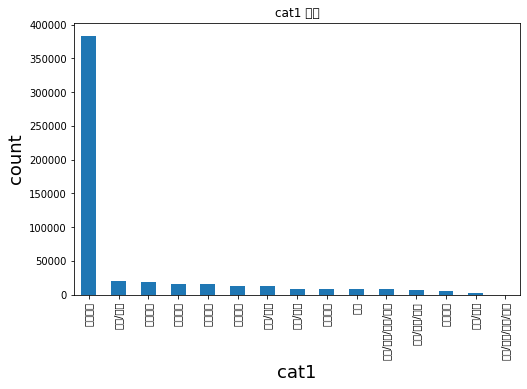

In [38]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

d = {'cat1':products['cat1'].value_counts().index, 'count': products['cat1'].value_counts()}
df_cat1 = pd.DataFrame(data=d).reset_index(drop=True)

df_cat1.plot(x='cat1', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat1 分布")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat1', fontsize=18)